In [140]:
import pandas as pd
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [141]:
assets = ['VTI', 'IEF', 'GLD', 'DBC']
all_weather_df = pd.DataFrame()

for asset in assets:
    all_weather_df[asset] = si.get_data(asset, start_date='01/01/1980')['close']

In [142]:
weights = [0.3, 0.4, 0.075, 0.225]

In [143]:
returns = all_weather_df.pct_change()

In [144]:
weighted_returns = returns * weights

In [145]:
all_weather_df['portfolio'] = weighted_returns.sum(axis=1)

In [146]:
all_weather_df['cumulative_portfolio'] = (1 + all_weather_df['portfolio']).cumprod()

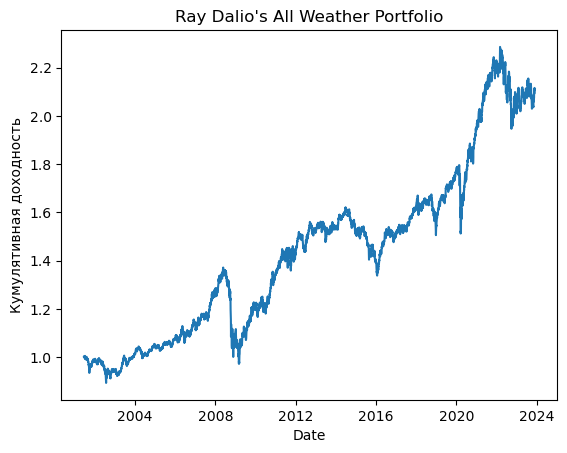

In [147]:
plt.plot(all_weather_df['cumulative_portfolio'])
plt.xlabel('Date')
plt.ylabel('Кумулятивная доходность')
plt.title('Ray Dalio\'s All Weather Portfolio')
plt.show()

In [148]:
all_weather_df

,VTI,IEF,GLD,DBC,portfolio,cumulative_portfolio
2001-06-15,55.665001,NaN,NaN,NaN,0.000000,1.000000
2001-06-18,55.310001,NaN,NaN,NaN,-0.001913,0.998087
2001-06-19,55.465000,NaN,NaN,NaN,0.000841,0.998926
2001-06-20,56.049999,NaN,NaN,NaN,0.003164,1.002087
2001-06-21,56.500000,NaN,NaN,NaN,0.002409,1.004500
...,...,...,...,...,...,...
2023-11-20,224.789993,92.660004,183.369995,24.250000,0.005517,2.111939
2023-11-21,224.179993,92.779999,185.350006,24.389999,0.001813,2.115767
2023-11-22,225.139999,92.750000,184.559998,24.180000,-0.001102,2.113436
2023-11-24,225.380005,92.269997,185.520004,24.020000,-0.002849,2.107415


In [149]:
# список тикеров портфеля
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']

In [150]:
# загрузка данных о ценах закрытия для тикеров
prices = yf.download(tickers, start='2016-01-01', end='2021-12-31')['Adj Close']
prices.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2016-01-04,23.977478,31.849501,37.972000,48.698895
2016-01-05,23.376621,31.689501,38.076500,48.921051
2016-01-06,22.919142,31.632500,37.966499,48.032379
2016-01-07,21.951849,30.396999,37.049999,46.361694
2016-01-08,22.067928,30.352501,36.545502,46.503880


In [151]:
# расчет доходностей для каждого тикера
returns = prices.pct_change().dropna()
returns.head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2016-01-05,-0.025059,-0.005024,0.002752,0.004562
2016-01-06,-0.019570,-0.001799,-0.002889,-0.018165
2016-01-07,-0.042205,-0.039058,-0.024140,-0.034782
2016-01-08,0.005288,-0.001464,-0.013617,0.003067
2016-01-11,0.016192,0.017610,0.002955,-0.000573


In [152]:
# расчет доходности портфеля
portfolio_returns = returns.mean(axis=1)
portfolio_returns.head()

Date
2016-01-05   -0.005692
2016-01-06   -0.010606
2016-01-07   -0.035046
2016-01-08   -0.001681
2016-01-11    0.009046
dtype: float64

In [153]:
# расчет стандартного отклонения доходности портфеля
portfolio_std = portfolio_returns.std()
portfolio_std

0.015248924396527176

In [154]:
# загрузка данных о безрисковой ставке
risk_free_rate = yf.download('^TNX', start='2016-01-01', end='2021-12-31')['Adj Close'].mean() / 100
risk_free_rate

[*********************100%%**********************]  1 of 1 completed


0.01921211537339327

In [155]:
# расчет коэффициента Шарпа
sharpe_ratio = (portfolio_returns.mean() - risk_free_rate) / portfolio_std
sharpe_ratio

-1.1743955165770261

In [156]:
# расчет волатильности портфеля
portfolio_volatility = returns.std(axis=1).mean()
portfolio_volatility

0.007970920669265543

In [157]:
# вывод результатов
print(f"Коэффициент Шарпа портфеля: {sharpe_ratio:.2f}")
print(f"Средняя волатильность портфеля: {portfolio_volatility:.2f}")

Коэффициент Шарпа портфеля: -1.17
Средняя волатильность портфеля: 0.01


In [158]:
tick = yf.download(['AAPL', 'MSFT', 'AMZN', 'GOOGL'], start='2022-01-01')

[*********************100%%**********************]  4 of 4 completed


In [159]:
open = tick.pct_change().dropna()['Open']

In [160]:
open

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2022-01-04,0.026992,0.017237,0.002351,-0.001551
2022-01-05,-0.016536,-0.020858,-0.006713,-0.026790
2022-01-06,-0.038472,-0.020568,-0.051388,-0.039004
2022-01-07,0.001100,0.002377,0.008372,0.003193
2022-01-10,-0.022037,-0.019858,-0.022205,-0.014834
...,...,...,...,...
2023-11-20,-0.001892,0.017314,-0.016985,-0.006397
2023-11-21,0.008005,-0.008406,0.019448,0.011988
2023-11-22,0.000418,0.004586,0.008658,0.006202


In [161]:
open.std()

AAPL     0.018902
AMZN     0.027983
GOOGL    0.021541
MSFT     0.019561
dtype: float64

<Axes: xlabel='Date'>

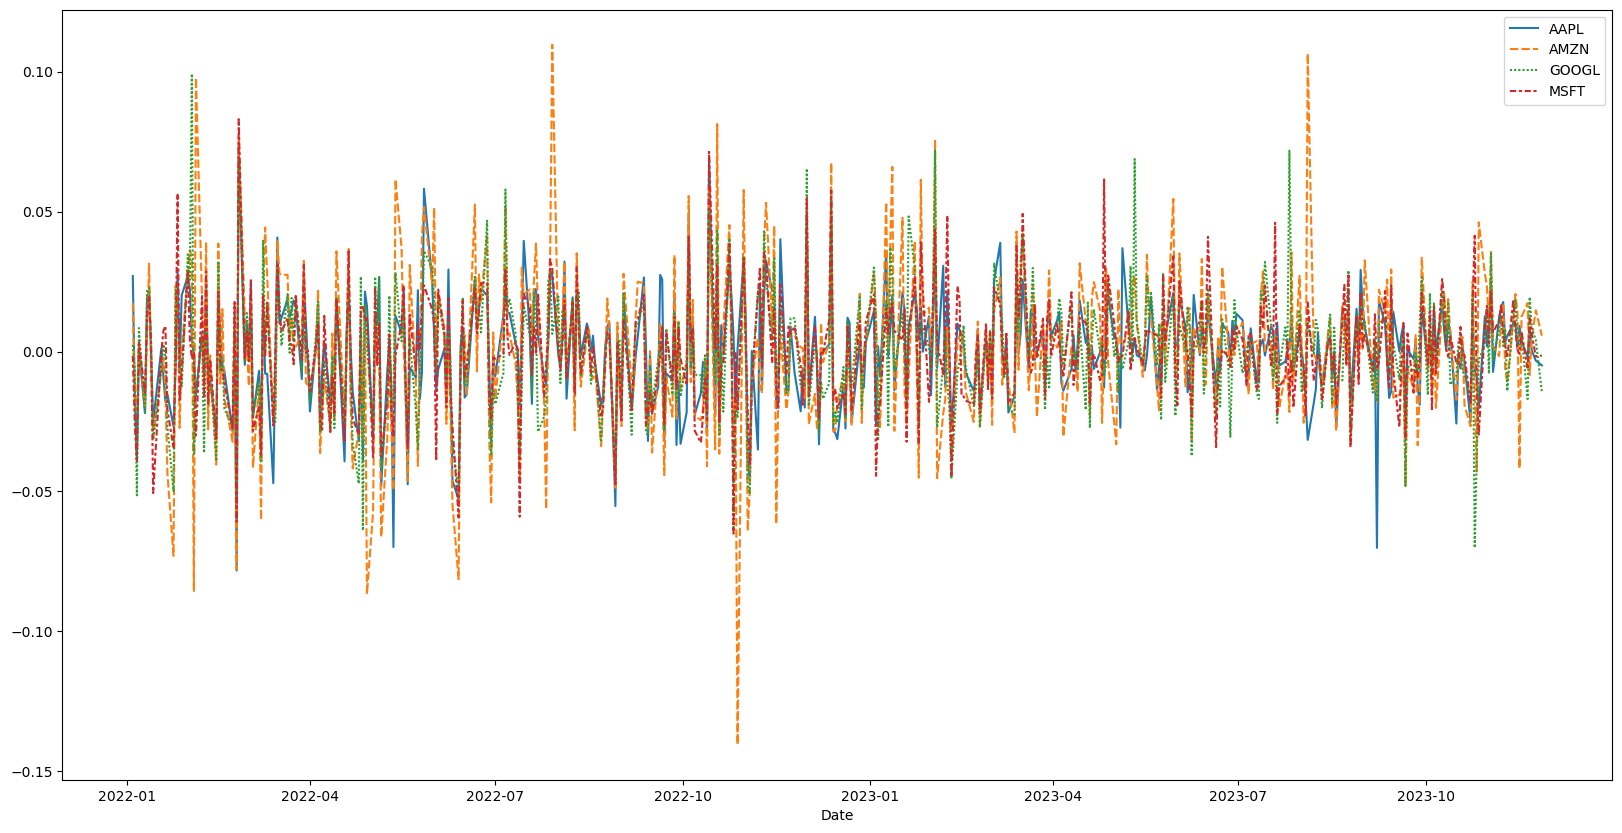

In [162]:
plt.figure(figsize=(20, 10))
sns.lineplot(open)